# Decision Tree

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [6]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [7]:
df=pd.read_csv('/kaggle/input/diabetes/diabetes.csv')

**Loading Data**

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [9]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

**Splitting Data**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


**Evaluating Model**

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(f"confusion matrix is: {confusion_matrix}")


confusion matrix is: [[85 14]
 [19 36]]


In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy is: {accuracy}")



accuracy is: 0.7857142857142857


**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [29]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus



**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [36]:
from sklearn.model_selection import GridSearchCV

parameters_grid = {
    'max_depth': [3,5,7,10],
    'criterion': ['gini', 'entropy']
}

classifier2 = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=classifier2, param_grid=parameters_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters:{best_params}")

best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Parameters:{'criterion': 'gini', 'max_depth': 3}
Accuracy: 0.7857142857142857


**Visualizing Decision Trees**

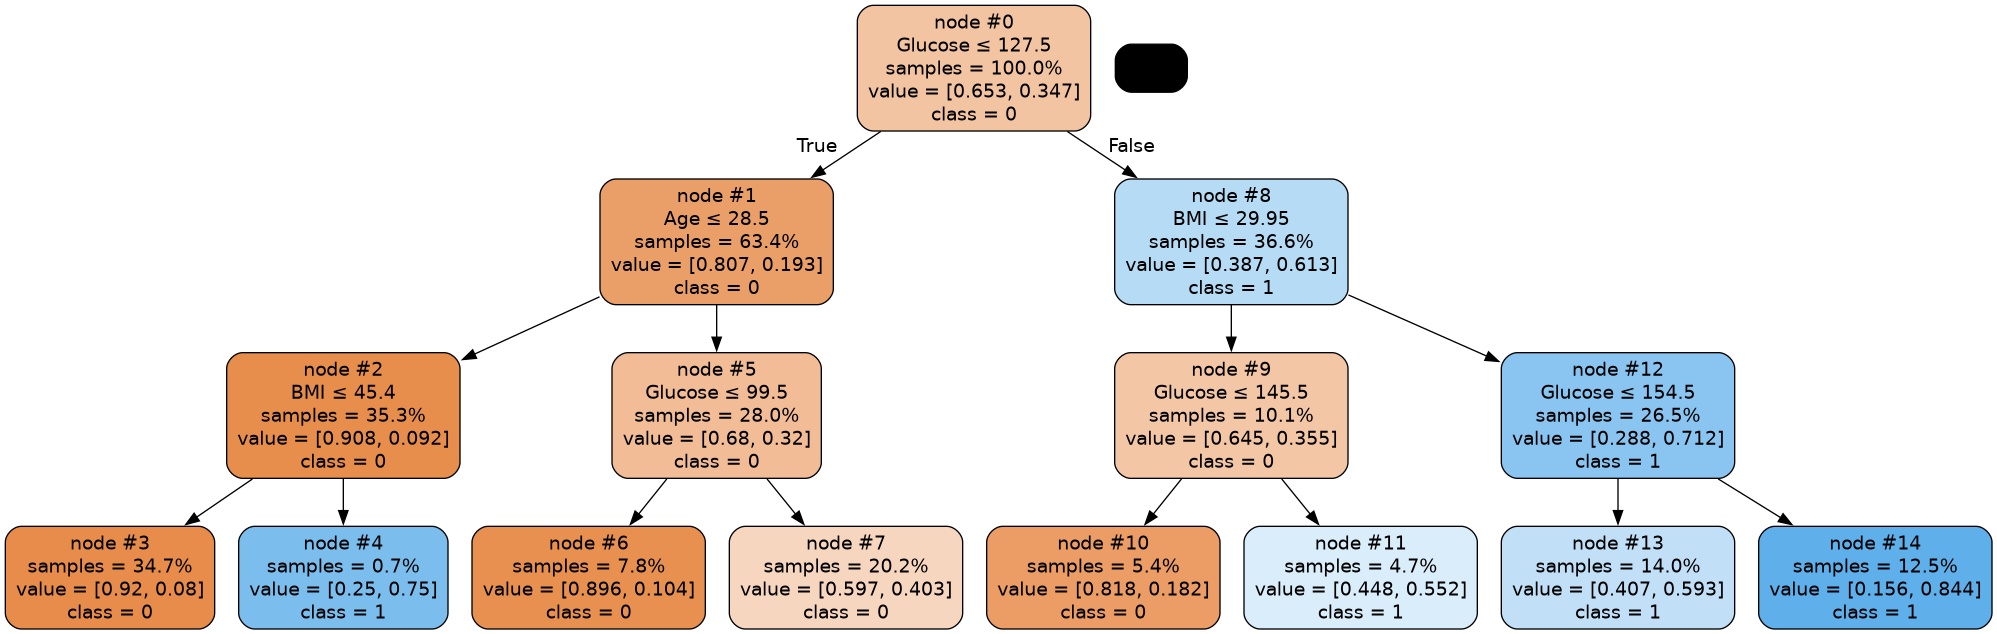

In [38]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Modify parameters to customize the appearance of the decision tree
dot_data = export_graphviz(best_clf, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True, feature_names=X.columns, class_names=['0', '1'],
                           max_depth=3, 
                           node_ids=True, 
                           proportion=True,  
                           impurity=False)  

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


**Implement Random Forest**

In [39]:
from sklearn.ensemble import RandomForestClassifier


In [42]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
y_pred_train=rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_train)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("accuracy on training dataset:",accuracy_rf_train)
print("accuracy on testing set: ",accuracy_rf)

accuracy on training dataset: 0.998371335504886
accuracy on testing set:  0.8246753246753247


In [43]:
accuracy_rf

0.8246753246753247

If the model overfitting try out different way to fix it!!

In [45]:
rf2 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)

In [44]:
rf2.fit(X_train, y_train)
y_pred_rf = rf2.predict(X_test)
y_pred_train=rf2.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_train)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("accuracy on train",accuracy_rf_train)   #overfitted accuracy
print("accuracy on test",accuracy_rf)

accuracy on train 0.9592833876221498
accuracy on test 0.8051948051948052


### All the best!!! I hope you will Enjoy the Task!